In [198]:
# This notebook is to Exploring the strategies and come up with innovative way to impute the missing values in the given dataset

## House Prices dataset: Data Analysis

I am taking one of popular sample dataset from kaggle. Since this dataset have some good amount of missing values hence sticking to it.


In [160]:
#import important libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from IPython.core.interactiveshell import InteractiveShell

# for plotting:
import matplotlib.pyplot as plt
import seaborn as sns


In [161]:
#load dataset
df = pd.read_csv('houseprice.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [162]:
# Get the info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [163]:
# Clearly there ar lot of missing values. Let us look at the missing  values %

vars_na = [ var for var in df.columns if df[var].isna().sum() > 1]

for var in vars_na:
    print(var, np.round(df[var].isnull().mean(), 3),  ' % missing values')

LotFrontage 0.177  % missing values
Alley 0.938  % missing values
MasVnrType 0.005  % missing values
MasVnrArea 0.005  % missing values
BsmtQual 0.025  % missing values
BsmtCond 0.025  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.025  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.473  % missing values
GarageType 0.055  % missing values
GarageYrBlt 0.055  % missing values
GarageFinish 0.055  % missing values
GarageQual 0.055  % missing values
GarageCond 0.055  % missing values
PoolQC 0.995  % missing values
Fence 0.808  % missing values
MiscFeature 0.963  % missing values


In [164]:
# There are multiple missing Values and some of the features have high number of missing values like PoolQC and Fence.

#### Relationship between values being missing and Sale Price

Evaluate price of the house for those cases where the information is missing, for each variable.

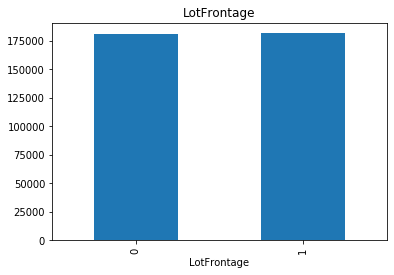

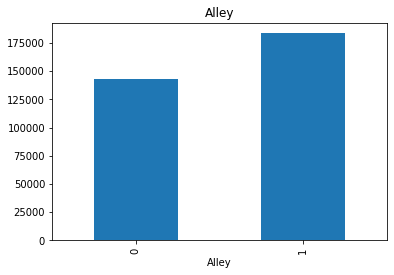

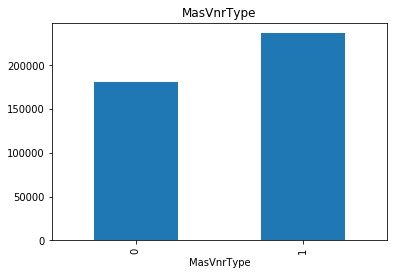

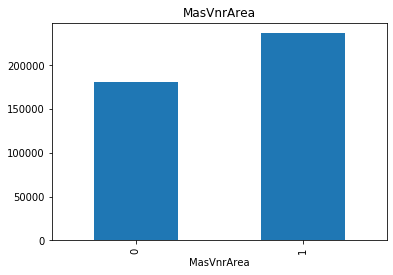

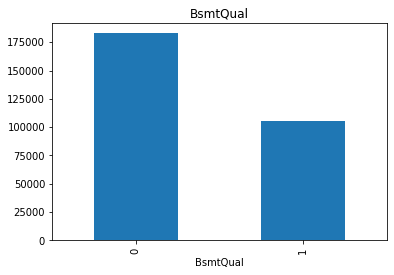

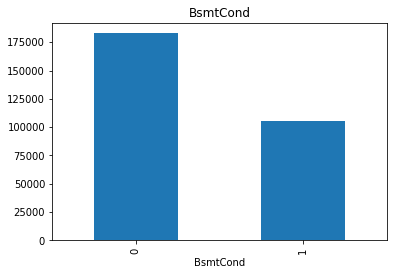

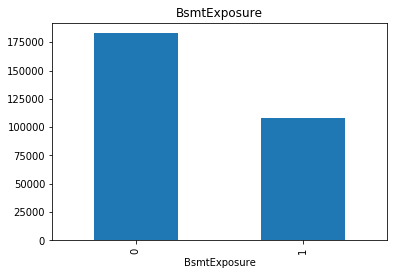

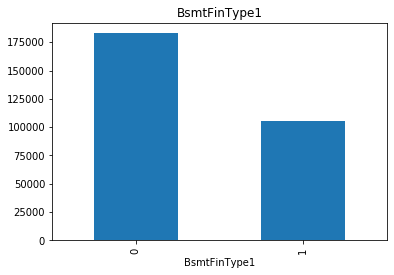

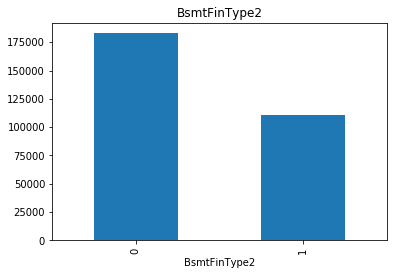

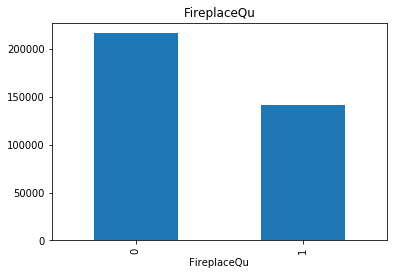

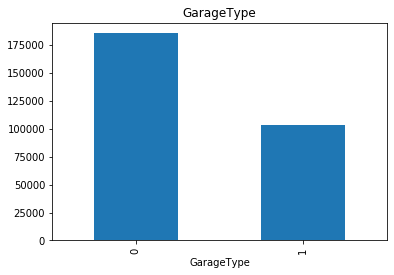

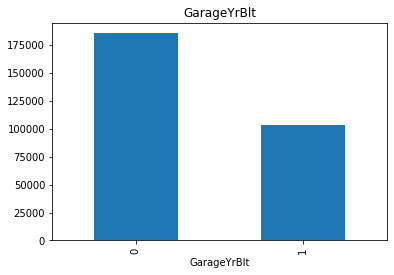

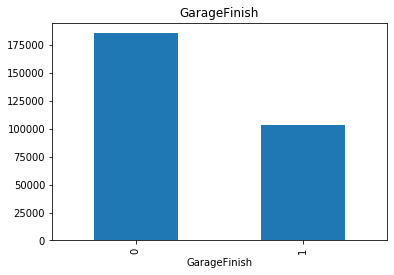

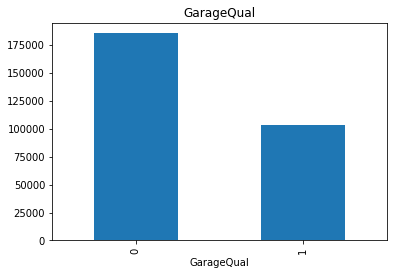

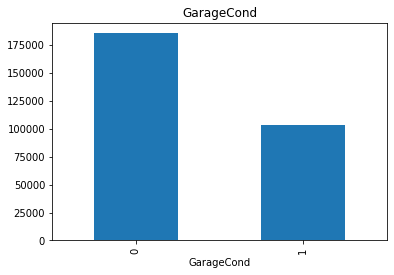

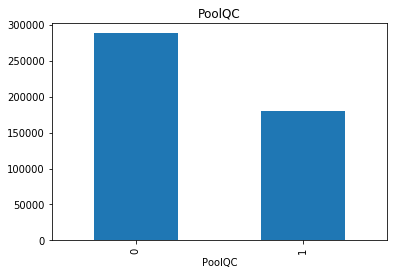

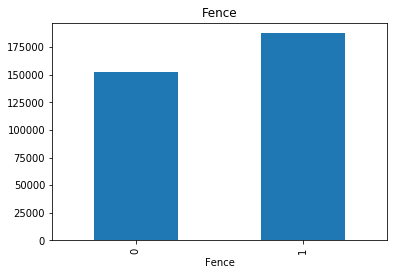

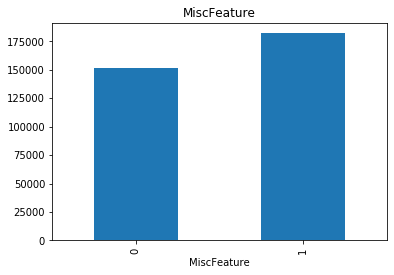

In [165]:
def analyze_na_value(df,var):
    df = df.copy()
    
    
    # let's make a variable that indicates 1 if the observation was missing or zero if not
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    df.groupby(var)['SalePrice'].mean().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_na:
    analyze_na_value(df, var)

- With the above observation we can be sure that missing information for the variables is important hence we cannot discard those and need to treat them appropriately



- Before we start the treatment of missing values. we will drop rest all the columns which does not have missing values except the target variable i.e Sale Price. I understand that with the drop of columns we are losing lot of critical information but that is not the objective here. Objective is to come up with some innovative way of filling the missing values in data when the other columns are also having some missing values.


In [166]:
vars_notna = [i for i in df.columns if i != 'SalePrice' and i not in vars_na] 
vars_notna

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [167]:
df_new = df.drop(vars_notna, axis= 1)
df_new.isna().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
SalePrice          0
dtype: int64

In [168]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
LotFrontage     1201 non-null float64
Alley           91 non-null object
MasVnrType      1452 non-null object
MasVnrArea      1452 non-null float64
BsmtQual        1423 non-null object
BsmtCond        1423 non-null object
BsmtExposure    1422 non-null object
BsmtFinType1    1423 non-null object
BsmtFinType2    1422 non-null object
FireplaceQu     770 non-null object
GarageType      1379 non-null object
GarageYrBlt     1379 non-null float64
GarageFinish    1379 non-null object
GarageQual      1379 non-null object
GarageCond      1379 non-null object
PoolQC          7 non-null object
Fence           281 non-null object
MiscFeature     54 non-null object
SalePrice       1460 non-null int64
dtypes: float64(3), int64(1), object(15)
memory usage: 216.8+ KB


# Imputation of Missing Values and analysis: 
- Picking MasVnrArea as the variable for missing values treatment as would like to start off with the one which is not categorical.


- MasVnrArea- This is responsible for deciding the quality of construction of houses. Most of the house buyers are interested in the construction quality of the data. Hence choosing this to come with up way to treat its missing values.


- Since I will be filling MasVnrArea to fill in but while I explore its relation with the Categorical Variables I would need   to have cat variables NAN value handle Hence before starting the exploration w.r.t Cat Variable I am replacing NA with missing keywords.


In [169]:
# make a list of the categorical variables that contain missing values
vars_cat_na = [var for var in df_new.columns if df_new[var].isnull().sum()>1 and df_new[var].dtypes=='O']

# print the variable name and the percentage of missing values
for var in vars_cat_na:
    print(var, np.round(df_new[var].isnull().mean(), 3),  ' % missing values')

Alley 0.938  % missing values
MasVnrType 0.005  % missing values
BsmtQual 0.025  % missing values
BsmtCond 0.025  % missing values
BsmtExposure 0.026  % missing values
BsmtFinType1 0.025  % missing values
BsmtFinType2 0.026  % missing values
FireplaceQu 0.473  % missing values
GarageType 0.055  % missing values
GarageFinish 0.055  % missing values
GarageQual 0.055  % missing values
GarageCond 0.055  % missing values
PoolQC 0.995  % missing values
Fence 0.808  % missing values
MiscFeature 0.963  % missing values


In [170]:
# function to replace NA with Missing keyword in categorical variables. It will be handy later in the process.
def fill_categorical_na(df_new, var_list):
    X = df_new.copy()
    X[var_list] = df_new[var_list].fillna('Missing')
    return X

In [171]:
# Splitting into train and test datasets for the imputing the Values into MasVnrType as mentioned above in pointers
test  = df_new[df_new.MasVnrArea.isnull()]
train = df_new[~df_new.MasVnrArea.isnull()]
target = train.MasVnrArea

In [172]:
train = fill_categorical_na(train,vars_cat_na)
test = fill_categorical_na(test,vars_cat_na)

In [173]:
target.head()

0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64

In [174]:
train.isna().sum()

LotFrontage     257
Alley             0
MasVnrType        0
MasVnrArea        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
FireplaceQu       0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageQual        0
GarageCond        0
PoolQC            0
Fence             0
MiscFeature       0
SalePrice         0
dtype: int64

In [175]:
test.isna().sum()

LotFrontage     2
Alley           0
MasVnrType      0
MasVnrArea      8
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
SalePrice       0
dtype: int64

Exploring our interested feature. We can clearly see following:
- There are outliers visible from the box plot and long tails from the Density plot
- There is small cluster peak visible in the density plot onto the right side.

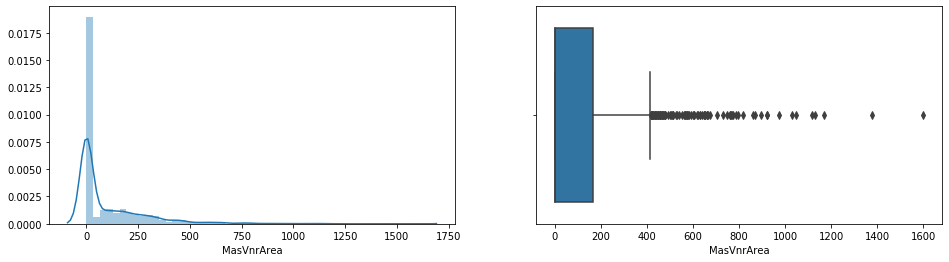

In [176]:
fig, ax =plt.subplots(1,2, figsize=(16,4))
sns.distplot(target, ax=ax[0])
sns.boxplot(target, ax=ax[1]);

# Mutlivariate analysis: 
- Exploring here the relation between the MasVnrArea and the Lot frontage Area as this is also one of the important feature.

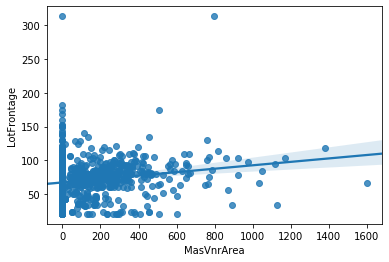

In [177]:
sns.regplot(train.MasVnrArea,train.LotFrontage)

- Note the above tight grouping in the lower end which is the same we were seeing across the distplot above. I can also notice that some of the data points are showing the relation that larger the MasVnsArea then larger is the lotfrontage which is understandable as the houses with lot front area larger would have larger Messenry Van Area.


- It may be good to explore some other variables as well. I will try to look for some of the categorical variable relation with the MasVnrArea.

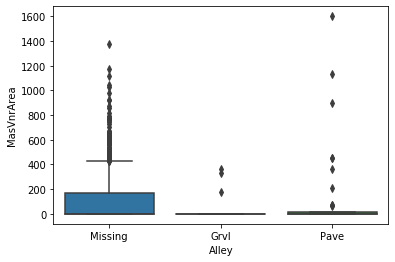

In [178]:
# Looking at the variable Alley it is also visible that Data Points have No Alley value are with larger median value
sns.boxplot(x=train['Alley'], y=train['MasVnrArea']);


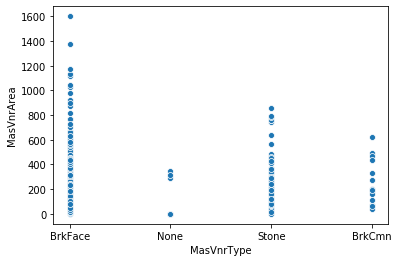

In [179]:
# Looking at the relation between MasVnrArea and MasVnrTyp as they should be correlated.
sns.scatterplot(x = 'MasVnrType', y = 'MasVnrArea', data = train )

In [180]:
train.columns
train.isna().sum()

LotFrontage     257
Alley             0
MasVnrType        0
MasVnrArea        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
FireplaceQu       0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageQual        0
GarageCond        0
PoolQC            0
Fence             0
MiscFeature       0
SalePrice         0
dtype: int64

In [181]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace = True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(),inplace = True)


In [182]:
# I will fill in the values for MasVnrArea using the above exploration of variables:
y_MasvnrArea = train['MasVnrArea']
X_train = train.loc[:,['LotFrontage', 'Alley', 'MasVnrType', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']]

In [183]:
X_train = pd.get_dummies(X_train)
X_train = (X_train - X_train.mean())/X_train.std()

- From the relation between MasVnrArea and Lotfrontage there was heteroscedasticity visibile hence linear regression would not be a good fit due to changing variance hence sticking to Support Vector Machines. Lasso and Ridge could have been tried but its a tradeoff between the time and better results.

- Creating the pipeline object and Randomsearch to find the best parameters for figuring the best parameters which can used later to fit.

In [184]:
pipeline = Pipeline([
                     ("sv", SVR())
                 ])

param_grid_svc = {'sv__kernel':['linear', 'rbf', 'poly'],
                 'sv__gamma':[0.1, 1,0.001,0.01],
                 'sv__C':[0.1,1, 10,100,2],
                 'sv__degree' : [0, 1, 2, 3, 4, 5, 6]
                }


In [186]:
RandomSearch = RandomizedSearchCV(pipeline,param_grid_svc,cv = 5)
RandomSearch.fit(X_train,y_MasvnrArea)
print ('\n')
print ("Best Parameter for RandomCV is {}".format(RandomSearch.best_estimator_))

C:\Users\Pmohan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)




Best Parameter for RandomCV is Pipeline(memory=None,
         steps=[('sv',
                 SVR(C=100, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
                     gamma=0.001, kernel='linear', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


In [ ]:
# Above are the best parameters after cross validation by RandomCV.

In [191]:
clf = svm.SVR(kernel='linear', C=100, gamma=0.001)

In [192]:
clf.fit(X_train,y_MasvnrArea)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [194]:
# Selecting now for final Imputation by using the predicted values.
X_test = test.loc[:,['LotFrontage', 'Alley', 'MasVnrType', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']]
X_test = pd.get_dummies(X_test)
X_test = (X_test - X_test.mean())/X_test.std()
X_test = X_test.fillna(0)

In [195]:
# Dummy columns from training set are replicated in test set
for col in (set(X_train.columns) - set(X_test.columns)):
    X_test[col] = 0

X_test = X_test[X_train.columns]


In [197]:
## Assign predicted MasvnrArea value in entire bigger dataset which was used initially for splitting.

In [196]:
df_new.loc[df_new.MasVnrArea.isnull(),'MasVnrArea'] = clf.predict(X_test)

# Closing Notes:

- Above approach could be one of the way one can use to fill missing values in the feature.

- As an extension I can extend it to compare it by using aggregated mean of the other independent variables for ex: Lot frontage again and calculate the Mean absolute error between the model wise prediction and aggrated mean which ever is less will be used.